<a href="https://colab.research.google.com/github/angshumancertified/Solar-PV-forecast-with-Machine-Learning-/blob/main/SolarForecastML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("/content/Solar Power Plant Data.csv")


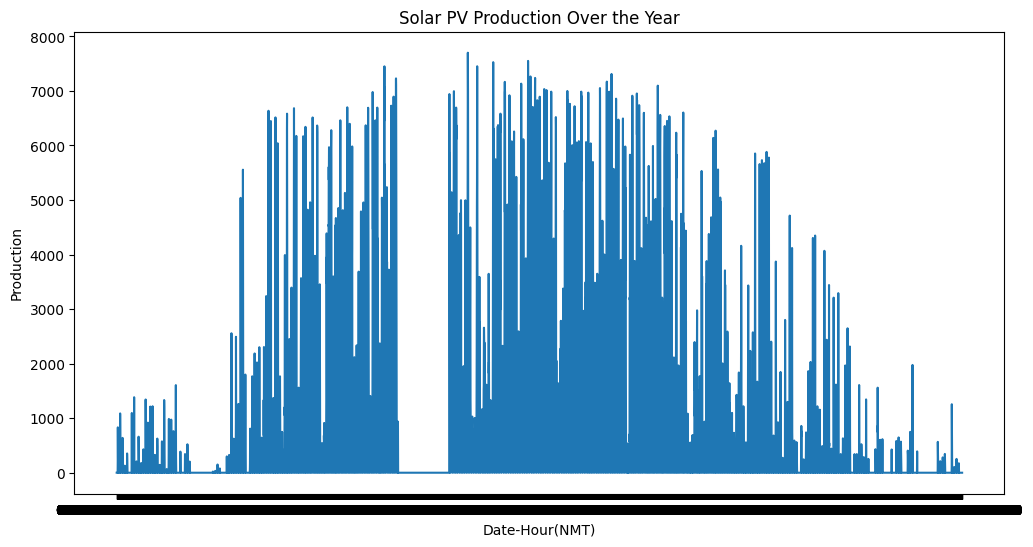

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data['Date-Hour(NMT)'], data['SystemProduction'])
plt.title('Solar PV Production Over the Year')
plt.xlabel('Date-Hour(NMT)')
plt.ylabel('Production')
plt.show()

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


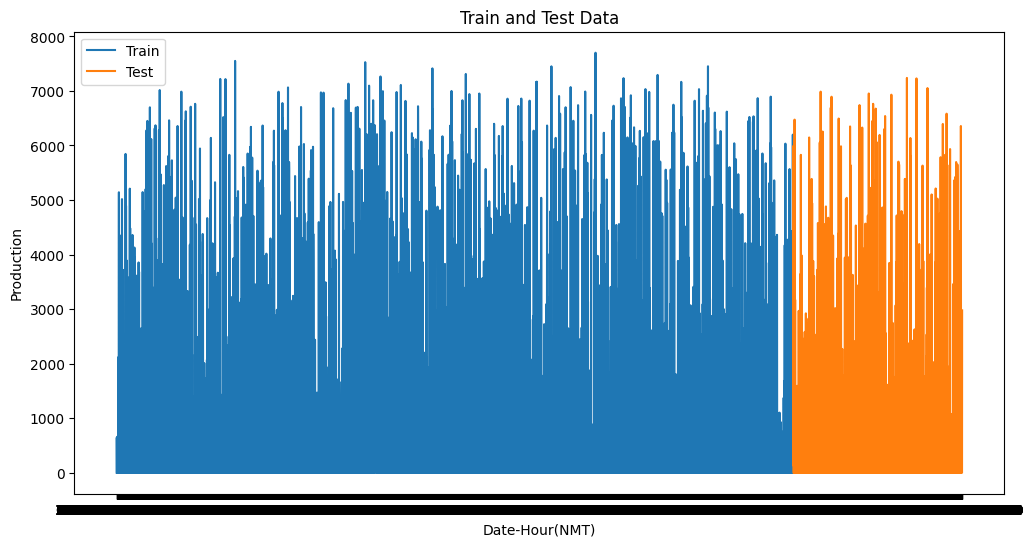

In [7]:
plt.figure(figsize=(12,6))
plt.plot(train['Date-Hour(NMT)'], train['SystemProduction'], label='Train')
plt.plot(test['Date-Hour(NMT)'], test['SystemProduction'], label='Test')
plt.title('Train and Test Data')
plt.xlabel('Date-Hour(NMT)')
plt.ylabel('Production')
plt.legend()
plt.show()


In [8]:
features = ['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity']

X_train = train[features]
y_train = train['SystemProduction']
X_test = test[features]
y_test = test['SystemProduction']

In [9]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
predictions = model.predict(X_test)

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

RMSE: 769.2911496704706


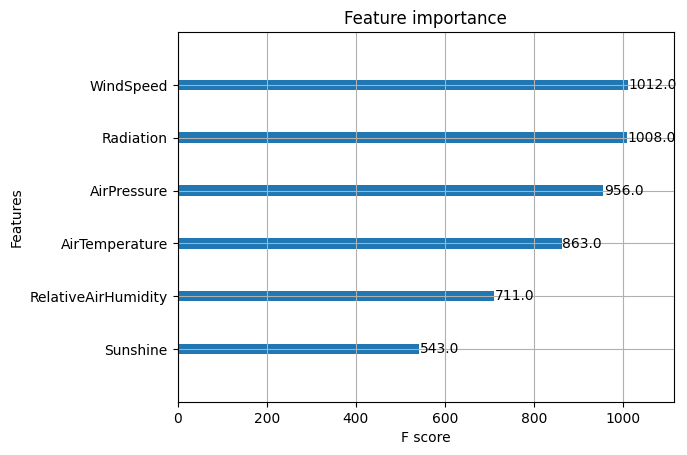

In [12]:
plot_importance(model)
plt.show()

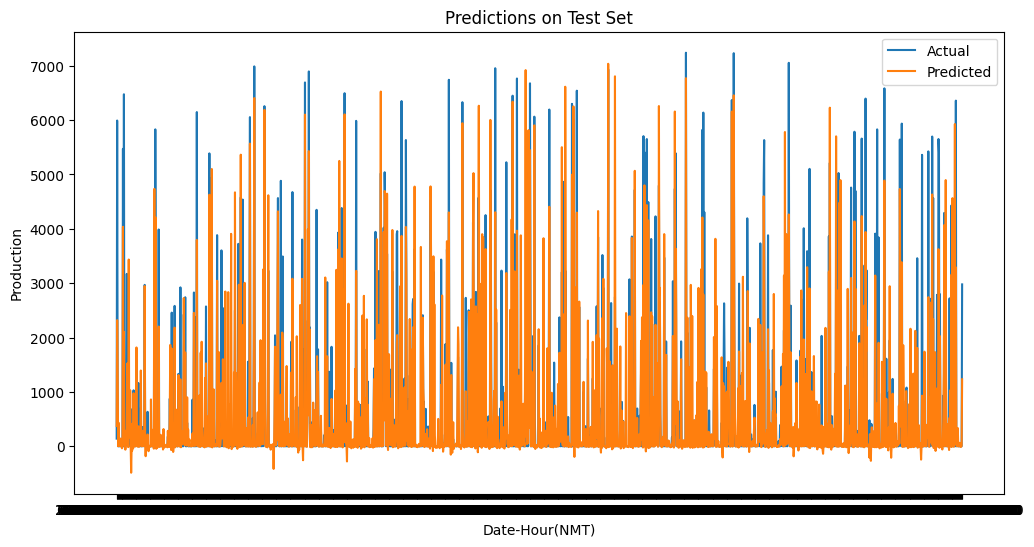

In [13]:
plt.figure(figsize=(12,6))
plt.plot(test['Date-Hour(NMT)'], test['SystemProduction'], label='Actual')
plt.plot(test['Date-Hour(NMT)'], predictions, label='Predicted')
plt.title('Predictions on Test Set')
plt.xlabel('Date-Hour(NMT)')
plt.ylabel('Production')
plt.legend()
plt.show()

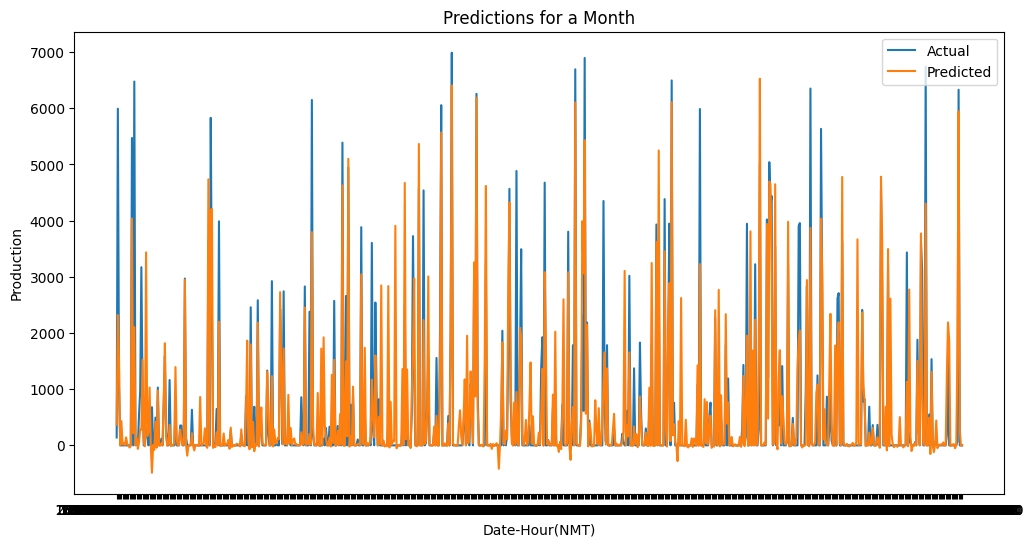

In [14]:
plt.figure(figsize=(12,6))
plt.plot(test['Date-Hour(NMT)'][:24*30], test['SystemProduction'][:24*30], label='Actual')
plt.plot(test['Date-Hour(NMT)'][:24*30], predictions[:24*30], label='Predicted')
plt.title('Predictions for a Month')
plt.xlabel('Date-Hour(NMT)')
plt.ylabel('Production')
plt.legend()
plt.show()

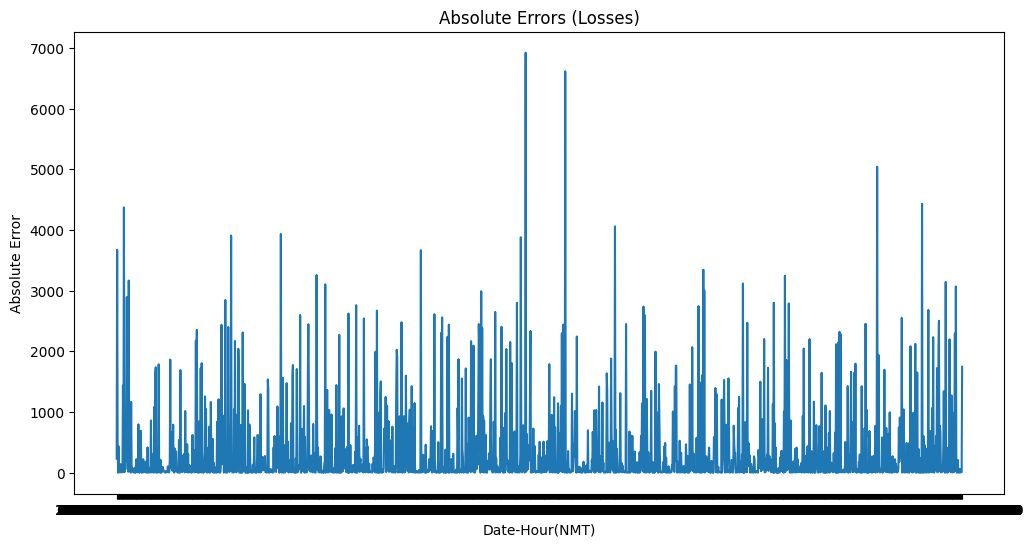

In [15]:
plt.figure(figsize=(12,6))
plt.plot(test['Date-Hour(NMT)'], np.abs(predictions - test['SystemProduction']))
plt.title('Absolute Errors (Losses)')
plt.xlabel('Date-Hour(NMT)')
plt.ylabel('Absolute Error')
plt.show()